In [85]:
# Importing the standard Python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scenario Discovery of Best Solution

In [86]:
# Loading in the results from the experiments needed for the scenario discovery
from ema_workbench import load_results

experiments, outcomes = load_results('PRIM_bestsolution.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Anne Boijmans\Documents\EPA\EPA1361\UPDATE3\final assignment\PRIM_bestsolution.tar.gz


In [87]:
# Loading in the necessary modules for EMA workbench and functions
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport

from problem_formulation import sum_over

In [88]:
# Loading in the necessary modules for EMA workbench and functions
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation

# Loading in all the 17 objectives via predefined problem formulation 3
if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)

    dike_model = get_model_for_problem_formulation(3)

[MainProcess/INFO] model initialized


In [89]:
# Replicate the uncertainties
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])
CategoricalParameter('discount rate', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)


In [90]:
# Replicate the levers
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('A.1_DikeIncrease', 0, 10)
IntegerParameter('A.2_DikeIncrease', 0, 10)
IntegerParameter('A.3_DikeIncrease', 0, 10)
IntegerParameter('A.4_DikeIncrease', 0, 10)
IntegerParameter('A.5_DikeIncrease', 0, 10)
IntegerParameter('0_RfR', 0, 1)
IntegerParameter('1_RfR', 0, 1)
IntegerParameter('2_RfR', 0, 1)
IntegerParameter('3_RfR', 0, 1)
IntegerParameter('4_RfR', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)


In [91]:
# Replicate the objectives
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage')
ScalarOutcome('A.1_Dike Investment Costs')
ScalarOutcome('A.1_Expected Number of Deaths')
ScalarOutcome('A.2_Expected Annual Damage')
ScalarOutcome('A.2_Dike Investment Costs')
ScalarOutcome('A.2_Expected Number of Deaths')
ScalarOutcome('A.3_Expected Annual Damage')
ScalarOutcome('A.3_Dike Investment Costs')
ScalarOutcome('A.3_Expected Number of Deaths')
ScalarOutcome('A.4_Expected Annual Damage')
ScalarOutcome('A.4_Dike Investment Costs')
ScalarOutcome('A.4_Expected Number of Deaths')
ScalarOutcome('A.5_Expected Annual Damage')
ScalarOutcome('A.5_Dike Investment Costs')
ScalarOutcome('A.5_Expected Number of Deaths')
ScalarOutcome('RfR Total Costs')
ScalarOutcome('Expected Evacuation Costs')


In [92]:
# Import ScalarOutcome from ema_workbench to define the actor specific outcomes of interest in the next function
from ema_workbench import ScalarOutcome

In [93]:
# Writing a function to create actor specific problem formulations
def problem_formulation_actor(problem_formulation_actor):
   
    # Load the model:
    function = DikeNetwork()
    # workbench model:
    model = Model('dikesnet', function=function)
    # Outcomes are all costs, thus they have to minimized:
    direction = ScalarOutcome.MINIMIZE
    
    model.uncertainties = uncertainties
    model.levers = levers

    if problem_formulation_actor == 4: # RWS
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage',
                            variable_name=['{}_Expected Annual Damage'.format(dike)
                                                for dike in function.dikelist],
                            function=sum_over, kind=direction),

            ScalarOutcome('Total Investment Costs',
                            variable_name=['{}_Dike Investment Costs'.format(dike)
                                                for dike in function.dikelist] + ['RfR Total Costs'
                                                                                ] + ['Expected Evacuation Costs'],
                            function=sum_over, kind=direction),

            ScalarOutcome('Expected Number of Deaths',
                            variable_name=['{}_Expected Number of Deaths'.format(dike)
                                                for dike in function.dikelist],
                            function=sum_over, kind=direction)] 
    
    elif problem_formulation_actor == 5: # GELDERLAND
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage A1-4',
                            variable_name=['A.1_Expected Annual Damage' ,'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage'], function=sum_over, kind=direction),

            ScalarOutcome('Investment Costs A1-4',
                            variable_name=['A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs'], function=sum_over, kind=direction),

            ScalarOutcome('Expected Number of Deaths in A1-4',
                            variable_name=['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths'], function=sum_over, kind=direction)]
    
    elif problem_formulation_actor == 6: # OVERIJSSEL
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage A5', variable_name=['A.5_Expected Annual Damage'], kind=direction),

            ScalarOutcome('Investment Costs A5', variable_name=['A.5_Dike Investment Costs'], kind=direction),

            ScalarOutcome('Expected Number of Deaths in A5', variable_name=['A.5_Expected Number of Deaths'], kind=direction)]
    
    else:
        raise TypeError('unknown identifier')
    return model

In [94]:
# Loading in the right problem formulation, in this case for Gelderland
model = problem_formulation_actor(5)

[MainProcess/INFO] model initialized


In [95]:
# Drop the levers from the experiments array to just keep the needed information
import numpy.lib.recfunctions as rf

results = experiments, outcomes
lever_names = [l.name for l in model.levers]
experiments = rf.drop_fields(experiments, drop_names=lever_names+['policy'], 
                             asrecarray=True)

## PRIM Analysis: Expected Number of Deaths

In [106]:
# PRIM analysis for the 'Expected Number of Deaths'
# Importing the PRIM analysis included in EMA workbench
from ema_workbench.analysis import prim

# Specifying the experiments and outcome
# For the outcome 'Expected Number of Deaths' the threshold is set to keep 30% of the points as cases of interest
x = experiments
y = (outcomes['Expected Number of Deaths in A1-4'] <= 0.008).astype(int)

# Executing the PRIM analysis with treshold=0.8, which stands for the minimum coverage threshold that a box should meet
prim_alg = prim.Prim(x,y, threshold=0.8)
box_deaths = prim_alg.find_box()

[MainProcess/INFO] 1000 points remaining, containing 337 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.208, coverage: 0.6172106824925816, density: 1.0 restricted_dimensions: 3


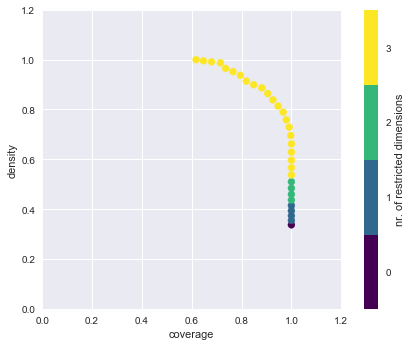

In [107]:
# Creating the trade-off visualisation
box_deaths.show_tradeoff()
plt.show()

In [110]:
# Inspecting the selected box for a coverage and density above 80%
box_deaths.inspect(18)

coverage    0.946588
density     0.813776
mass           0.392
mean        0.813776
res dim            3
Name: 18, dtype: object

             box 18                                    
                min       max                 qp values
A.3_pfail  0.297394  0.999501  [4.2888101194713598e-25]
A.2_pfail  0.273415  0.999175  [8.0799134156581469e-19]
A.1_pfail  0.223825  0.999658  [3.0308168465543677e-14]



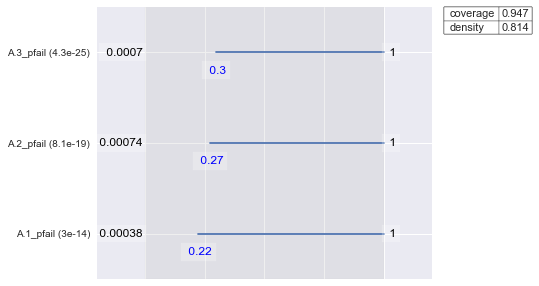

In [112]:
# Inspecting the selected box for a coverage and density above 80% - graph
box_deaths_graph = box_deaths.inspect(18, style='graph')
box_deaths_graph.set_size_inches(6,5)
plt.show()

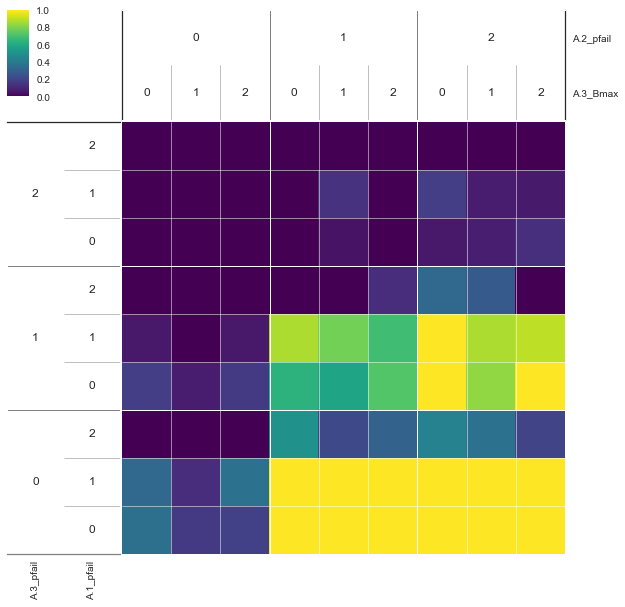

In [113]:
# Using dimensional stacking to check if the results of the scenario discovery give the same results
# The number of levels can be set on 2, since there are only 4 uncertainties that should be shown
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x,y, nr_levels=2) 
plt.show()

## PRIM Analysis: Expected Annual Damage

In [114]:
# PRIM analysis for the 'Expected Annual Damage'
# Importing the PRIM analysis included in EMA workbench
from ema_workbench.analysis import prim

# Specifying the experiments and outcome
# For the outcome 'Expected Annual Damage' the threshold is set to keep 30% of the points as cases of interest
x = experiments
y = (outcomes['Expected Annual Damage A1-4'] <= 50000000).astype(int)

# Executing the PRIM analysis with treshold=0.8, which stands for the minimum coverage threshold that a box should meet
prim_alg = prim.Prim(x,y, threshold=0.8)
box_damage = prim_alg.find_box()

[MainProcess/INFO] 1000 points remaining, containing 336 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.114, coverage: 0.3392857142857143, density: 1.0 restricted_dimensions: 5


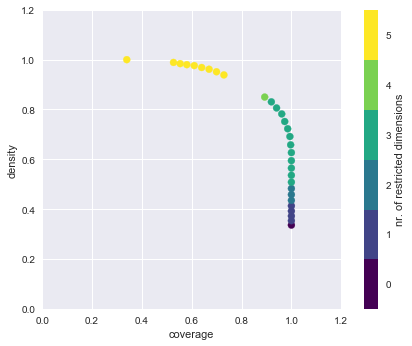

In [115]:
# Creating the trade-off visualisation
box_damage.show_tradeoff()
plt.show()

In [116]:
# Inspecting the selected box for a coverage and density above 80%
box_damage.inspect(18)

coverage    0.940476
density     0.806122
mass           0.392
mean        0.806122
res dim            3
Name: 18, dtype: object

             box 18                                    
                min       max                 qp values
A.3_pfail  0.256182  0.999501  [3.1893913452551304e-20]
A.2_pfail  0.273415  0.999175  [5.3908248220232659e-19]
A.1_pfail  0.258140  0.999658  [1.4094949842733187e-17]



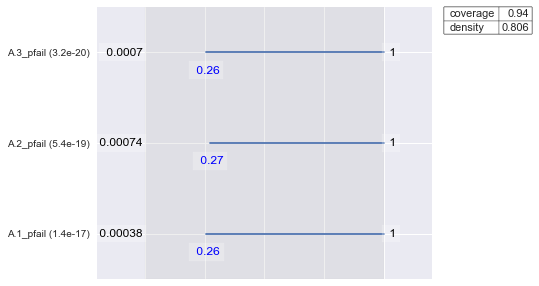

In [117]:
# Inspecting the selected box for a coverage and density above 80% - graph
box_damage_graph = box_damage.inspect(18, style='graph')
box_damage_graph.set_size_inches(6,5)
plt.show()

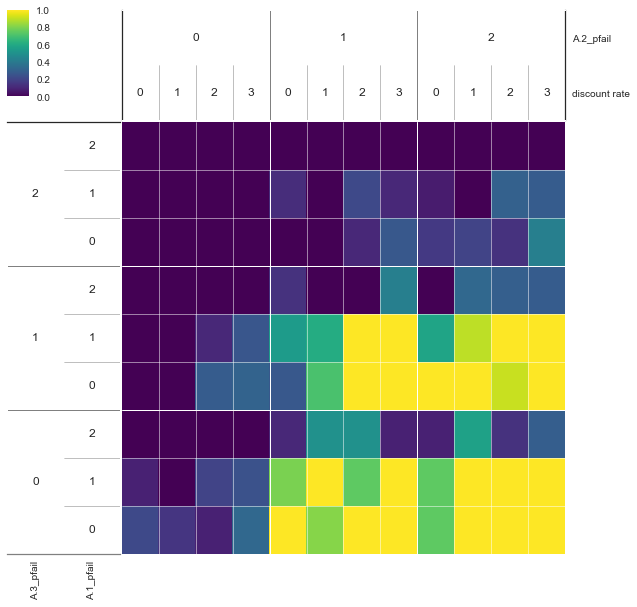

In [118]:
# Using dimensional stacking to check if the results of the scenario discovery give the same results
# The number of levels can be set on 2, since there are only 4 uncertainties that should be shown
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x,y, nr_levels=2)
plt.show()